Q4

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        20:36:48   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 I think they are not contradictory.R-squarde is 17.6% means that the model can only explain 17.6% of the data varaition.This usually indicates that the model may not have captured all possible predictor variables or may not be complex enough to capture the complex relationships in the data.If the p-value of a predictor variable is low,it can be concluded that it has a significant role in explaining the variation of the response variable.

The R-squared value reflects the model's suitability for the entire dataset.small R-squared indicates that there are other  unaccounted-for factors that may be affecting the model.

The p-value is specific to individual variables and it indicates the ability of a single variable to explain the model, rather than the overall explanation of the model.The p-value indicates that the independent variables we include are important in predicting the dependent variable we are trying to predict, even if we do not include all of the independent variables (with a low R-squared).

Q6

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738
'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873
'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215
'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933
'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


Q7

model3_fit: Includes basic predictors, such as Attack and Defense. It is a relatively simple model aimed at initially understanding the impact of Attack and Defense on Hit Points (HP).
model4_fit: Compared to model 3, it adds more interaction terms and predictors, such as Speed, Legendary, Sp. Def, etc. Adding these variables makes the model more complex in an attempt to capture more interactions between variables, but it might also introduce multicollinearity issues.
Model 5 to Model 6: Model 5 included all variables, while model 6 removed variables that were not significant for HP. This was done to reduce multicollinearity, lower model complexity, and improve generalization ability.
Model 6 to Model 7: Model 7 added key interaction terms based on model 6 to capture complex relationships between variables. The selection of these interaction terms was based on the hypothesis of possible interactions between variables. For example, the relationship between Attack and Speed may have a more complex impact on HP than a simple linear sum.

Q9

We evaluate the model's performance and effectiveness using the following data.

Checking Residual Patterns: We use plots to visually inspect whether the residuals are randomly distributed around zero. If residuals show patterns (e.g., curvature or clustering), it indicates that the model is not capturing all relationships in the data correctly.


Normality of Residuals: By generating a QQ plot and a histogram, we can check if the residuals are approximately normally distributed. This helps ensure that our model assumptions are met, which is important for making accurate predictions.

Autocorrelation: We use the Durbin-Watson statistic to determine if there is any correlation between the residuals. Ideally, residuals should be independent. A value near 2 for the Durbin-Watson statistic indicates no significant autocorrelation.


Heteroscedasticity: The Breusch-Pagan test helps identify if the variance of residuals is constant across all levels of the independent variables. If the p-value is high, it indicates that the variance is consistent (homoscedastic), which is a good thing for model stability.

Specifically, in this question, we are predicted the HP (Hit Points) of Pokemon based on several attributes like Attack, Defense, Speed, etc. By conducting residual analysis, we are checking if our model is capable of providing reliable predictions across different generations of Pokemon.

If the residuals are randomly distributed and meet normality, autocorrelation, and homoscedasticity assumptions, it indicates that our model captures the relationship between the features and HP well, and can be trusted to make predictions.

If the residuals show issues like non-normality, clustering, or heteroscedasticity, it suggests that our model may be missing important interactions or relationships. In that case, we need to refine our model—either by transforming the data, adding new interaction terms, or using a more complex modeling approach.

In sample R-squared: 0.6640639736364784
Out of sample R-squared: 0.6640639736364801
In sample R-squared: 0.6640639736364784 (gen1_predict_future)
Out of sample R-squared: 0.014720075729863964 (gen1_predict_future)


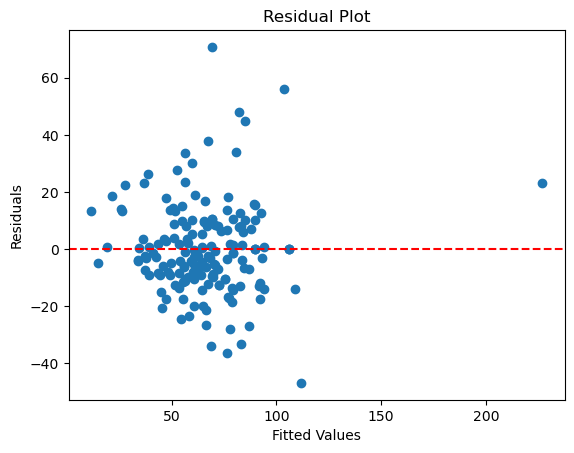

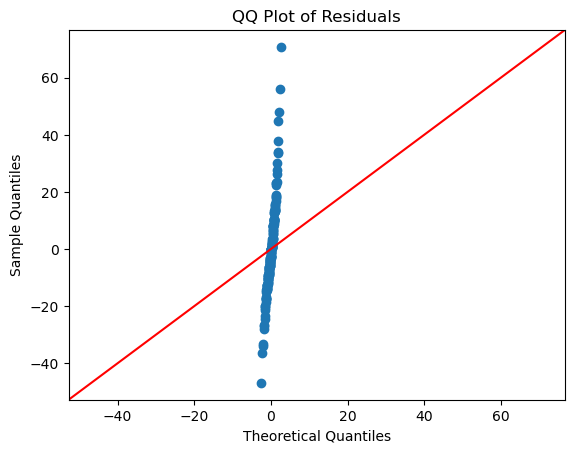

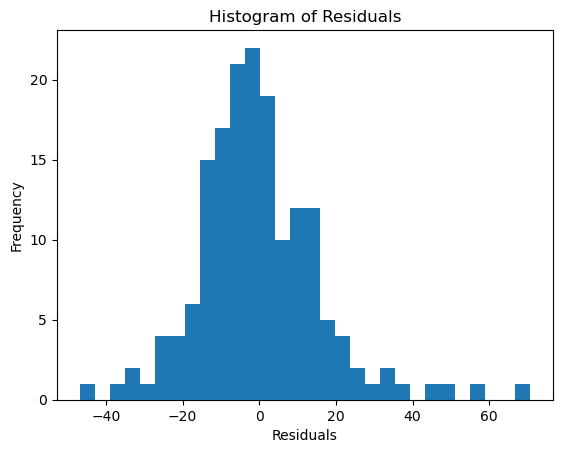

Durbin-Watson statistic: 1.5365269741129952
Breusch-Pagan test p-value: 0.9405631637288141


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)
model7_linear_form = 'HP ~ Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")'
model7_gen1_predict_future = smf.ols(formula=model7_linear_form, data=pokeaman[pokeaman.Generation == 1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()

print("In sample R-squared:", model7_gen1_predict_future_fit.rsquared)

y = pokeaman[pokeaman.Generation == 1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation == 1])
print("Out of sample R-squared:", np.corrcoef(y, yhat)[0, 1] ** 2)
model7_gen1_predict_future = smf.ols(formula=model7_linear_form, data=pokeaman[pokeaman.Generation == 1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("In sample R-squared:", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")

y = pokeaman[pokeaman.Generation != 1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation != 1])
print("Out of sample R-squared:", np.corrcoef(y, yhat)[0, 1]**2, "(gen1_predict_future)")
model_fitted_values = model7_gen1_predict_future_fit.fittedvalues
model_residuals = model7_gen1_predict_future_fit.resid

plt.scatter(model_fitted_values, model_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
sm.qqplot(model_residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

plt.hist(model_residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
dw_stat = durbin_watson(model_residuals)
print(f'Durbin-Watson statistic: {dw_stat}')
test = sms.het_breuschpagan(model_residuals, model7_gen1_predict_future_fit.model.exog)
print('Breusch-Pagan test p-value:', test[1])

In sample R-squared: 0.44372596782027796 (gen1to5_predict_future)
Out of sample R-squared: 0.13838686321662652 (gen1to5_predict_future)


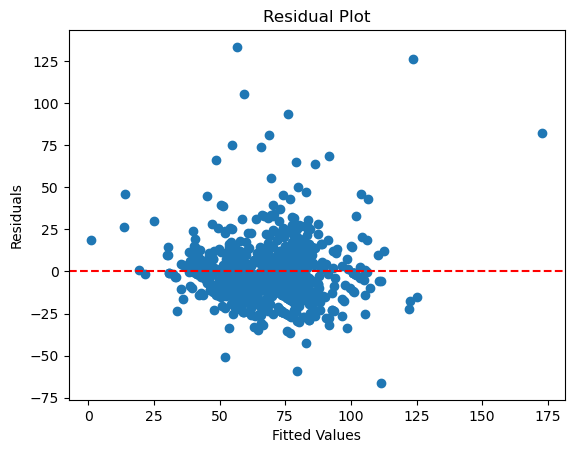

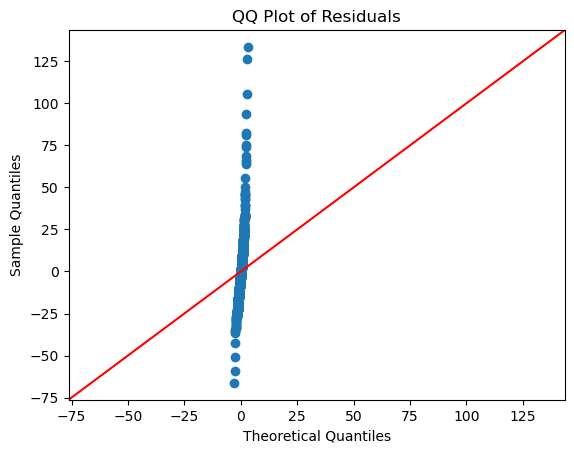

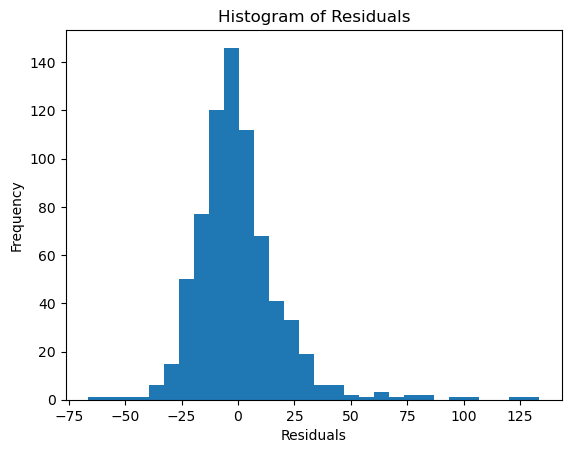

Durbin-Watson statistic: 1.5203286444084798
Breusch-Pagan test p-value: 1.0800759830620927e-06


In [2]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson

# 2. Load data
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)

# 3. Fit the model (using data excluding Generation 6)
model7_linear_form = 'HP ~ Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")'
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form, data=pokeaman[pokeaman.Generation != 6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()

# 4. In-sample and out-of-sample R-squared
# In-sample R-squared
print("In sample R-squared:", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")

# Out-of-sample R-squared (testing on Generation 6)
y = pokeaman[pokeaman.Generation == 6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation == 6])
print("Out of sample R-squared:", np.corrcoef(y, yhat)[0, 1]**2, "(gen1to5_predict_future)")

# 5. Plot Residuals
# Get fitted values and residuals
model_fitted_values = model7_gen1to5_predict_future_fit.fittedvalues
model_residuals = model7_gen1to5_predict_future_fit.resid

# Plot residuals
plt.scatter(model_fitted_values, model_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 6. Normality check with QQ Plot
# QQ Plot
sm.qqplot(model_residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# Residual histogram
plt.hist(model_residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# 7. Durbin-Watson test for autocorrelation
# Durbin-Watson statistic
dw_stat = durbin_watson(model_residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

# 8. Heteroscedasticity test
# Breusch-Pagan test
test = sms.het_breuschpagan(model_residuals, model7_gen1to5_predict_future_fit.model.exog)
print('Breusch-Pagan test p-value:', test[1])

In sample R-squared: 0.6640639736364784 (gen1_predict_future)
Out of sample R-squared: 0.014720075729863964 (gen1_predict_future)


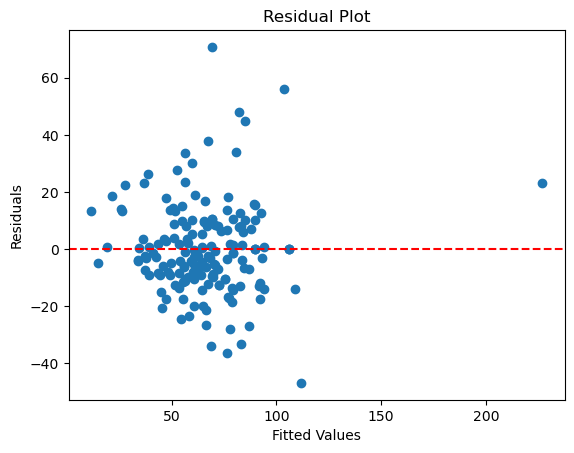

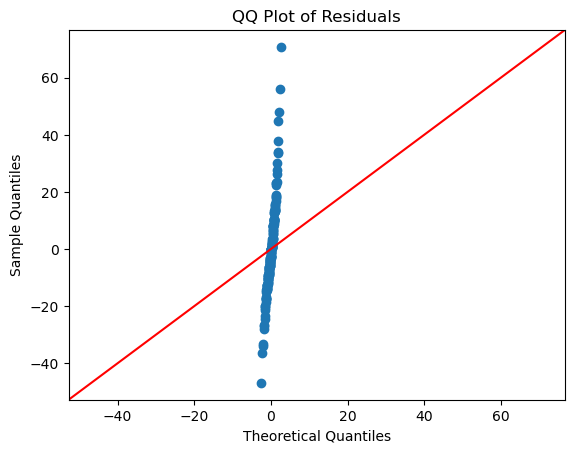

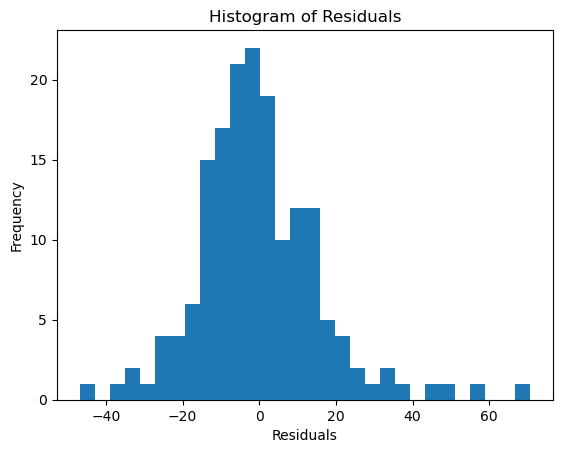

Durbin-Watson statistic: 1.5365269741129952
Breusch-Pagan test p-value: 0.9405631637288141


In [3]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson

# 2. Load data
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)

# 3. Fit the model (using Generation 1 data)
model6_linear_form = 'HP ~ Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")'
model6_gen1_predict_future = smf.ols(formula=model6_linear_form, data=pokeaman[pokeaman.Generation == 1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()

# 4. In-sample and out-of-sample R-squared
# In-sample R-squared
print("In sample R-squared:", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")

# Out-of-sample R-squared (testing on data not in Generation 1)
y = pokeaman[pokeaman.Generation != 1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation != 1])
print("Out of sample R-squared:", np.corrcoef(y, yhat)[0, 1]**2, "(gen1_predict_future)")

# 5. Plot Residuals
# Get fitted values and residuals
model_fitted_values = model6_gen1_predict_future_fit.fittedvalues
model_residuals = model6_gen1_predict_future_fit.resid

# Plot residuals
plt.scatter(model_fitted_values, model_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 6. Normality check with QQ Plot
# QQ Plot
sm.qqplot(model_residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# Residual histogram
plt.hist(model_residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# 7. Durbin-Watson test for autocorrelation
# Durbin-Watson statistic
dw_stat = durbin_watson(model_residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

# 8. Heteroscedasticity test
# Breusch-Pagan test
test = sms.het_breuschpagan(model_residuals, model6_gen1_predict_future_fit.model.exog)
print('Breusch-Pagan test p-value:', test[1])

In sample R-squared: 0.44372596782027796 (gen1to5_predict_future)
Out of sample R-squared: 0.13838686321662652 (gen1to5_predict_future)


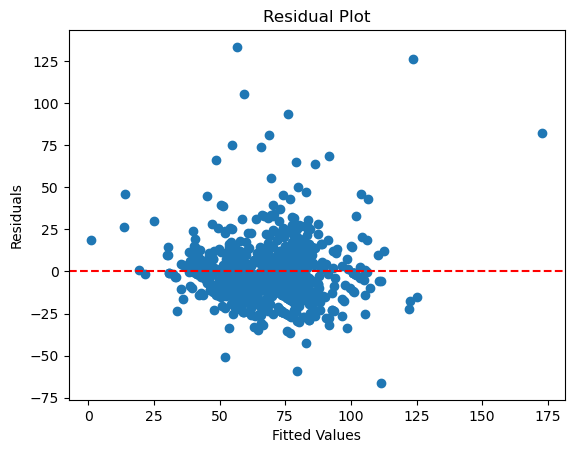

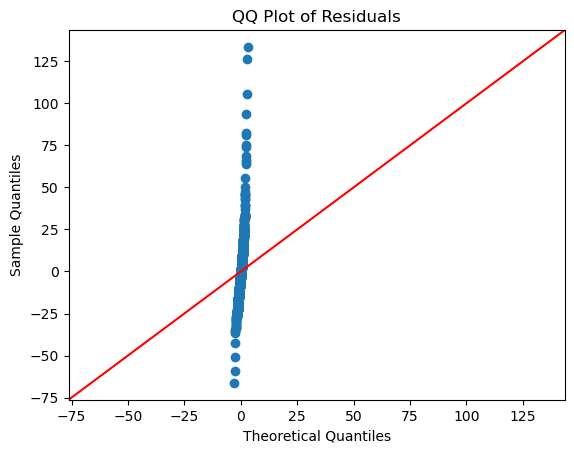

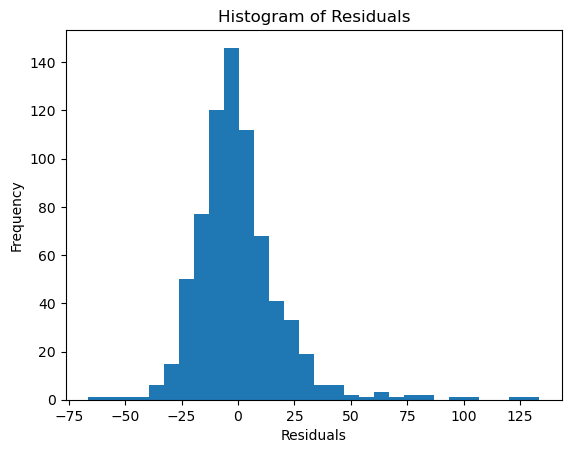

Durbin-Watson statistic: 1.5203286444084798
Breusch-Pagan test p-value: 1.0800759830620927e-06


In [4]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson

# 2. Load data
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)

# 3. Fit the model (using data excluding Generation 6)
model6_linear_form = 'HP ~ Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")'
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form, data=pokeaman[pokeaman.Generation != 6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()

# 4. In-sample and out-of-sample R-squared
# In-sample R-squared
print("In sample R-squared:", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")

# Out-of-sample R-squared (testing on Generation 6)
y = pokeaman[pokeaman.Generation == 6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation == 6])
print("Out of sample R-squared:", np.corrcoef(y, yhat)[0, 1]**2, "(gen1to5_predict_future)")

# 5. Plot Residuals
# Get fitted values and residuals
model_fitted_values = model6_gen1to5_predict_future_fit.fittedvalues
model_residuals = model6_gen1to5_predict_future_fit.resid

# Plot residuals
plt.scatter(model_fitted_values, model_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 6. Normality check with QQ Plot
# QQ Plot
sm.qqplot(model_residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# Residual histogram
plt.hist(model_residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# 7. Durbin-Watson test for autocorrelation
# Durbin-Watson statistic
dw_stat = durbin_watson(model_residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

# 8. Heteroscedasticity test
# Breusch-Pagan test
test = sms.het_breuschpagan(model_residuals, model6_gen1to5_predict_future_fit.model.exog)
print('Breusch-Pagan test p-value:', test[1])